# Preliminary operations

In [1]:
!pip install tslearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install awkward

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# import main libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Audio 
from collections import defaultdict
import librosa
from scipy.signal import decimate
import pathlib
from tqdm.notebook import tqdm
import awkward as ak

In [4]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import data

In [ ]:
dataset_folder = pathlib.Path("drive/MyDrive/Progetto Data Mining 2/CODICE PROGETTO/Time Series/DATASET/RavdessAudioOnly/")

file_list = list(dataset_folder.iterdir())
for i, path in enumerate(file_list):
    if path.suffix != ".wav":
        file_list.pop(i)
file_list = sorted(file_list)
file_list

In [ ]:
array = pd.DataFrame()
for path in tqdm(file_list):
    librosa_audio_segment, sr = librosa.load(path, sr=None)
    array = array.append(pd.Series(librosa_audio_segment), ignore_index=True)

In [11]:
array = array.dropna(axis=1, how='any')
nunique = array.nunique()
cols_to_drop = nunique[nunique == 1].index
array = array.drop(cols_to_drop, axis=1)
array.head()

,0,1,2,3,4,5,6,7,8,9,...,140931,140932,140933,140934,140935,140936,140937,140938,140939,140940
0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000031,0.000000,0.000000,0.000000,0.000000,0.000031,0.000000,0.000000,0.000000
2,-0.000031,0.0,-0.000031,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,-0.000061,-0.000061,-0.000031,-0.000061,-0.000061,-0.000031,-0.000061,-0.000061,-0.000061,-0.000061
3,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,-0.000031,0.000000,0.000000,-0.000031,-0.000092,-0.000061,-0.000031,0.000000,-0.000031,0.000000
4,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000031,0.0,0.000031,...,0.000031,0.000031,0.000031,0.000031,0.000031,0.000061,0.000031,0.000031,0.000031,0.000000


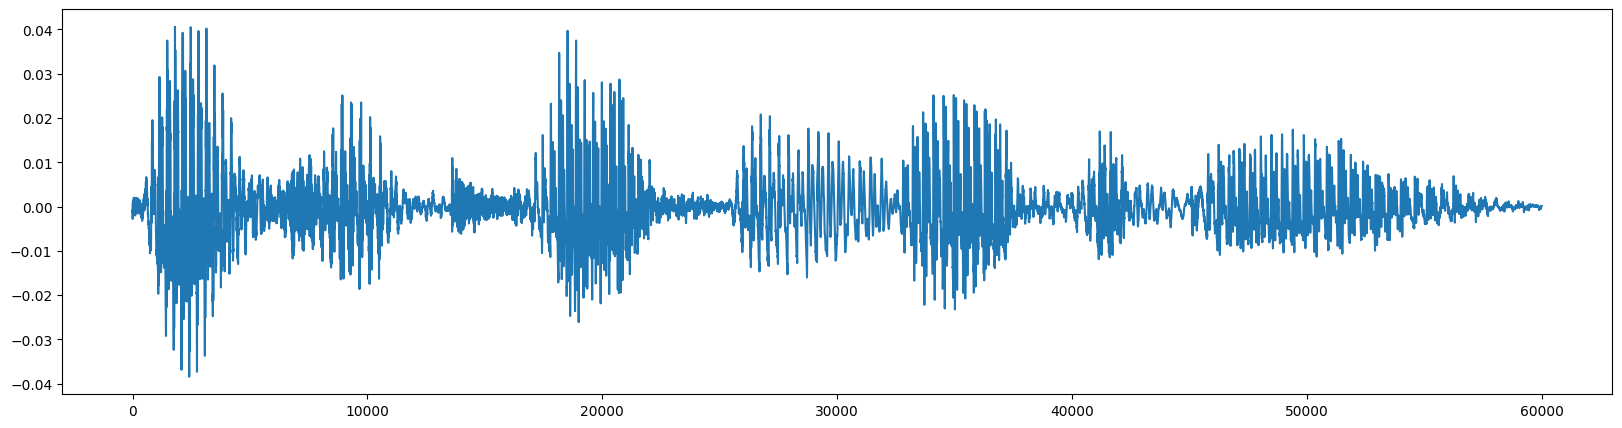

In [104]:
array_values = array.values

# plot the audio wave
plt.figure(figsize=(20,5))

for ts in array_values[:1, 50000:110000]:
  plt.plot(ts)

plt.savefig("time_serie.pdf", format="pdf")
plt.show()

In [13]:
def ts_decimate(ts):
  return pd.Series(decimate(ts, q=10))

In [14]:
def ts_cut(ts):
  return pd.Series(ts)

In [15]:
array_downsampled = array.apply(ts_decimate, axis=1)
array_downsampled.head(3)

,0,1,2,3,4,5,6,7,8,9,...,14085,14086,14087,14088,14089,14090,14091,14092,14093,14094
0,-1.234588e-07,2.897196e-07,-5.803670e-07,1.179014e-06,2.089583e-06,9.642929e-07,2.935713e-06,3.577443e-06,1.835550e-06,1.231055e-09,...,-4.636485e-10,-2.083913e-08,3.046837e-08,-2.923253e-08,2.035587e-08,-8.341618e-09,-3.137499e-09,1.061233e-08,-1.201240e-08,4.122160e-09
1,3.026687e-39,3.027231e-39,3.022892e-39,3.024235e-39,3.028561e-39,3.024900e-39,3.022141e-39,3.026784e-39,3.028167e-39,3.022583e-39,...,9.041214e-07,-5.072628e-06,-3.834426e-06,7.163909e-06,-4.452040e-07,7.110495e-06,1.649897e-05,7.937587e-06,6.535352e-06,4.606373e-06
2,-3.007247e-05,4.335748e-06,-3.307497e-06,-8.179960e-07,-2.060261e-06,-3.625654e-06,-1.318099e-07,-2.923218e-06,2.907024e-07,-2.077538e-06,...,3.680385e-06,1.049385e-05,2.679897e-05,3.880271e-07,-6.282971e-06,-3.537502e-05,-8.259487e-05,-7.359286e-05,-5.646671e-05,-5.962068e-05


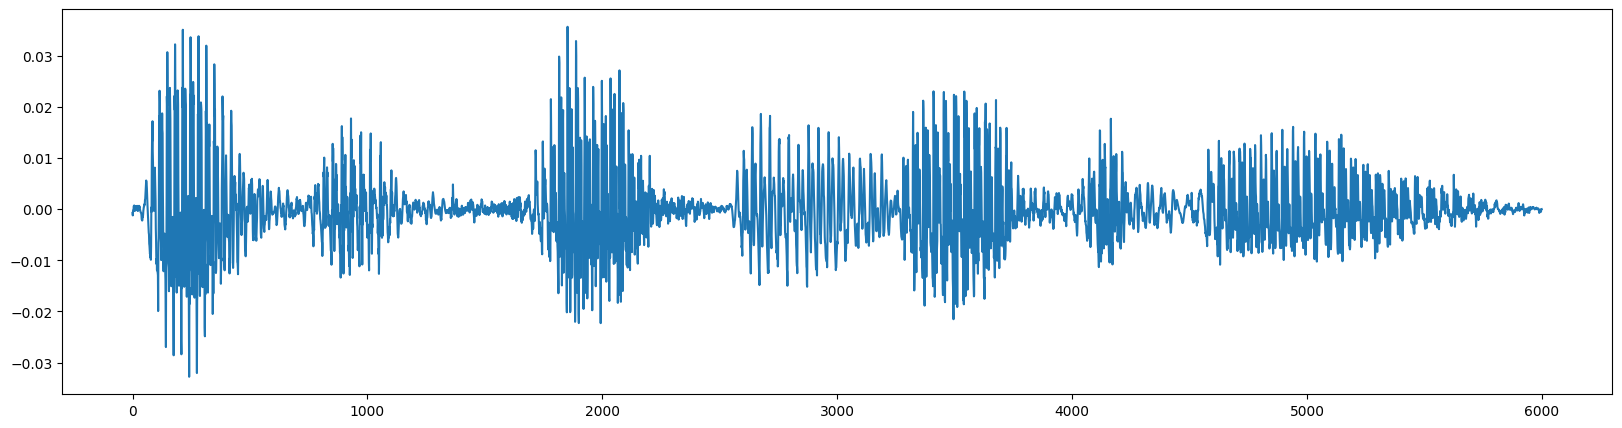

In [96]:
array_downsampled_values = array_downsampled.to_numpy()

# plot the downsampled audio wave
plt.figure(figsize=(20,5))

for ts in array_downsampled_values[:1, 5000:11000]:
  plt.plot(ts)
  
plt.show()

# Data Transformations

## Amplitude Scaling

In [ ]:
def amplitude_scaling(ts):
  return (ts - ts.mean())/ts.std()

In [ ]:
array_transformed = array_downsampled.apply(amplitude_scaling, axis=1)
array_transformed

,0,1,2,3,4,5,6,7,8,9,...,10089,10090,10091,10092,10093,10094,10095,10096,10097,10098
0,-0.000304,-0.000205,-0.000765,-0.000603,-0.000215,-0.000338,-0.000294,-0.000298,-0.000313,-0.000289,...,-0.000228,-0.000368,-0.000207,-0.000381,-0.000240,-0.000381,-0.003298,-0.005454,-0.004466,-0.002158
1,0.003722,-0.000561,0.000290,-0.000187,-0.000290,0.000183,-0.000077,0.000122,0.000023,0.000058,...,-0.008870,-0.006675,-0.009206,-0.010936,-0.007863,-0.008327,-0.005517,-0.000099,-0.000447,-0.000546
2,0.000300,0.000438,0.001397,0.001960,0.001977,0.002173,0.001294,0.000168,0.000231,0.000243,...,-0.001518,-0.003458,-0.002643,-0.000917,0.000451,0.002069,0.004420,0.006471,0.005242,0.005050
3,0.000043,0.000043,0.000043,0.000043,0.000043,0.000043,0.000043,0.000043,0.000043,0.000043,...,0.000077,0.000081,-0.000042,0.000123,-0.000019,0.000077,0.000036,0.000027,0.000070,0.000020
4,0.001590,0.001586,0.001590,0.001587,0.001587,0.001591,0.001583,0.001594,0.001582,0.001592,...,0.008647,0.006197,0.022318,0.033280,0.033959,0.035022,0.021081,0.011503,0.016605,0.021994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2447,-0.011596,0.020434,0.008865,-0.002292,0.010313,-0.015368,0.002108,-0.002236,-0.019745,0.029016,...,-0.162329,-0.537554,-0.805944,-1.006998,-1.072190,-0.444871,0.704467,1.567845,1.588636,0.602864
2448,-0.000027,0.000026,-0.000225,0.000212,-0.000065,-0.000923,-0.000039,-0.000448,-0.001507,-0.000832,...,-1.427101,-1.329416,-0.331102,0.929073,1.610111,1.328480,0.407944,-0.392418,-0.695832,-0.674912
2449,-0.025328,-0.001655,0.033548,-0.003407,-0.004740,0.032186,-0.006428,-0.011716,0.001854,-0.041261,...,0.208207,0.052304,0.131490,-0.053148,-0.058790,-0.036608,-0.183732,-0.169176,-0.137980,-0.104248
2450,-0.004096,-0.002121,-0.003183,-0.001444,-0.001321,-0.001511,-0.000299,-0.000322,-0.000205,-0.000249,...,0.292524,0.609743,1.104782,1.483496,1.040296,0.239756,-0.124088,-0.286469,-0.610725,-0.251970


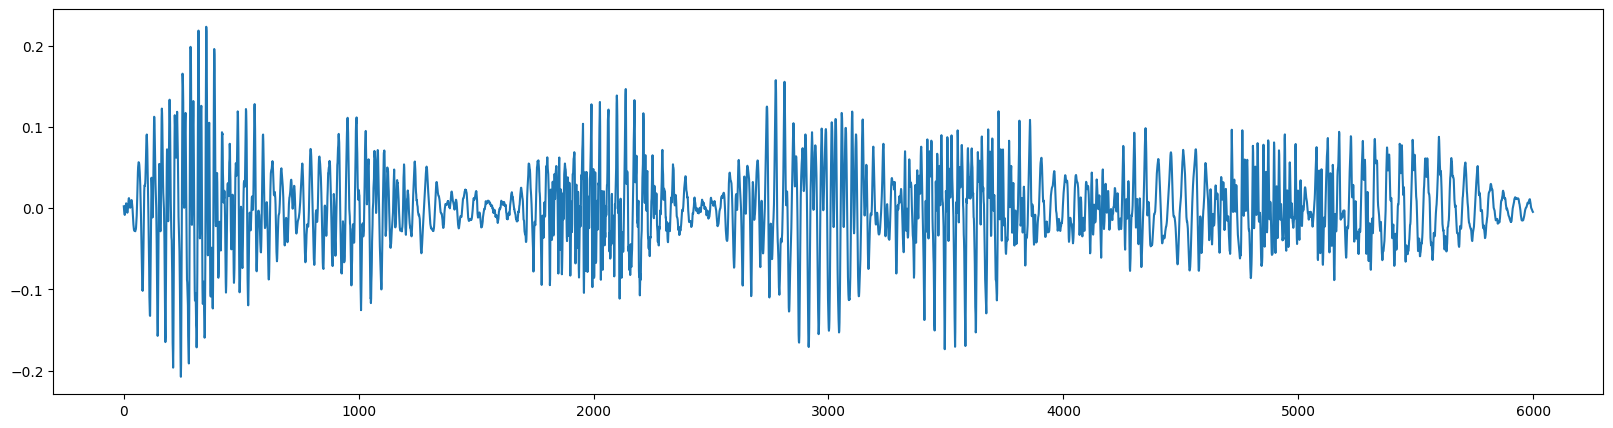

In [97]:
array_transformed_values = array_transformed.values

plt.figure(figsize=(20,5))

for ts in array_transformed_values[:1, 5000:11000]:
  plt.plot(ts)

plt.show()

## Noise removal (smoothing)

In [18]:
def noise_removal(ts):
  return ((ts - ts.mean())/ts.std()).rolling(window=141).mean()

In [19]:
array_transformed = array_downsampled.apply(noise_removal, axis=1)
array_transformed

,0,1,2,3,4,5,6,7,8,9,...,14085,14086,14087,14088,14089,14090,14091,14092,14093,14094
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.000214,-0.000208,-0.000194,-0.000193,-0.000193,-0.000190,-0.000180,-0.000157,-0.000140,-0.000125
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.001026,-0.001039,-0.001041,-0.001036,-0.001034,-0.001029,-0.001011,-0.001003,-0.001000,-0.000977
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000764,0.000687,0.000635,0.000599,0.000501,0.000421,0.000335,0.000250,0.000194,0.000128
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000104,0.000103,0.000105,0.000102,0.000103,0.000090,0.000075,0.000068,0.000053,0.000042
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.022488,0.022505,0.022546,0.022556,0.022501,0.022456,0.022424,0.022407,0.022393,0.022307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2447,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.002306,-0.001426,-0.002197,0.002001,0.006028,0.006238,0.004535,0.003015,-0.006103,-0.018278
2448,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.015601,-0.026300,-0.023356,-0.008871,0.008777,0.022633,0.029972,0.031293,0.028120,0.020583
2449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.001485,0.001242,0.000755,-0.000085,-0.001152,-0.001956,-0.002391,-0.002440,-0.002063,-0.001456
2450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.012603,-0.000345,-0.004397,-0.000816,0.001704,-0.002625,-0.013796,-0.033636,-0.050451,-0.054941


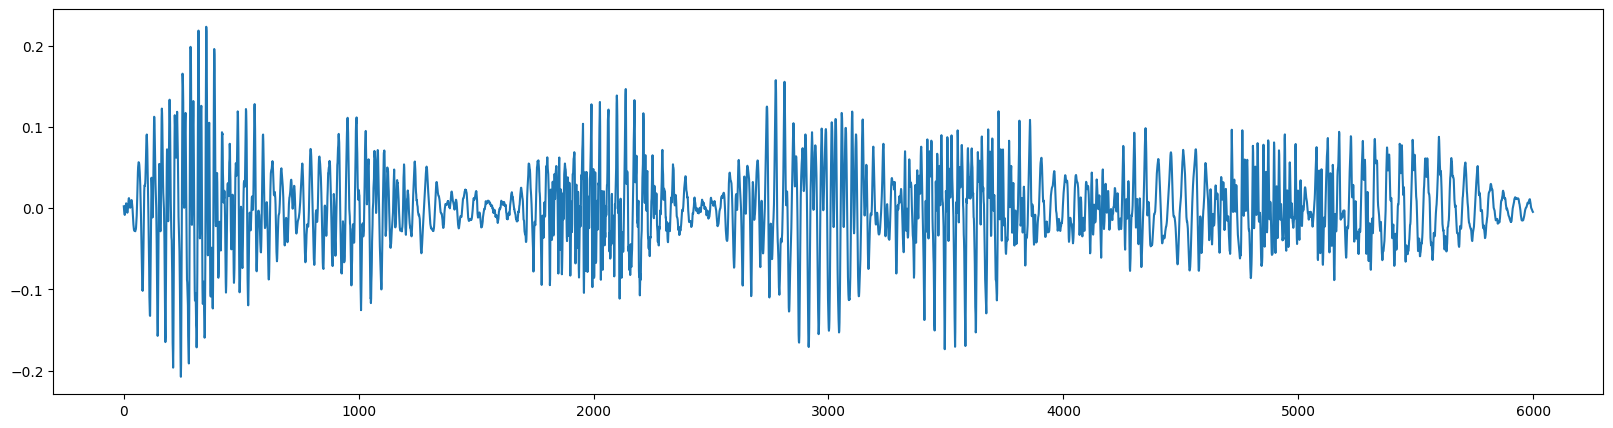

In [103]:
array_transformed_values = array_transformed.values

plt.figure(figsize=(20,5))

for ts in array_transformed_values[:1, 5000:11000]:
  plt.plot(ts)

plt.savefig("time_series_prepared.pdf", format="pdf")
plt.show()

##Export

In [21]:
CATEGORICAL_FEATURES_NAMES = {
    "modality": {"01": "full-AV", "02": "video-only", "03": "audio-only"}, 
    "vocal_channel": {"01": "speech", "02": "song"},
    "emotion": {"01" : "neutral", "02" : "calm", "03" : "happy", "04" : "sad", "05" : "angry", "06" : "fearful", "07" : "disgust", "08" : "surprised"},
    "emotional_intensity": {"01" : "normal", "02" : "strong"},
    "statement": {"01" : "Kids are talking by the door", "02" : "Dogs are sitting by the door"},
    "repetition": {"01" : "1st", "02" : "2nd"},
    "actor": {str(i).zfill(2): str(i).zfill(2) for i in range(1, 25)}
}

In [22]:
df = list()
file_names = list()
for path in file_list:
    stem = path.stem.split("-")
    file_names.append(path.name)
    df.append(stem)
df = pd.DataFrame(df)
df.columns = list(CATEGORICAL_FEATURES_NAMES.keys())

for column in df.columns:
    df = df.replace(CATEGORICAL_FEATURES_NAMES)

df["sex"] = ["F" if i % 2 == 0 else "M" for i in df["actor"].astype(int)]
df["filename"] = file_names

In [23]:
df.head()

,modality,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,sex,filename
0,audio-only,speech,neutral,normal,Kids are talking by the door,1st,01,M,03-01-01-01-01-01-01.wav
1,audio-only,speech,neutral,normal,Kids are talking by the door,1st,02,F,03-01-01-01-01-01-02.wav
2,audio-only,speech,neutral,normal,Kids are talking by the door,1st,03,M,03-01-01-01-01-01-03.wav
3,audio-only,speech,neutral,normal,Kids are talking by the door,1st,04,F,03-01-01-01-01-01-04.wav
4,audio-only,speech,neutral,normal,Kids are talking by the door,1st,05,M,03-01-01-01-01-01-05.wav


In [24]:
df_sorted_actor = df.sort_values(by=["actor", "filename"])
idxs_sorted = list(df_sorted_actor.index)

In [25]:
idx_train = list(df_sorted_actor[df_sorted_actor.actor.astype(int) < 19].index)
idx_test = list(df_sorted_actor[df_sorted_actor.actor.astype(int) >= 19].index)

In [26]:
array_transformed.head()

,0,1,2,3,4,5,6,7,8,9,...,14085,14086,14087,14088,14089,14090,14091,14092,14093,14094
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.000214,-0.000208,-0.000194,-0.000193,-0.000193,-0.000190,-0.000180,-0.000157,-0.000140,-0.000125
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.001026,-0.001039,-0.001041,-0.001036,-0.001034,-0.001029,-0.001011,-0.001003,-0.001000,-0.000977
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000764,0.000687,0.000635,0.000599,0.000501,0.000421,0.000335,0.000250,0.000194,0.000128
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000104,0.000103,0.000105,0.000102,0.000103,0.000090,0.000075,0.000068,0.000053,0.000042
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.022488,0.022505,0.022546,0.022556,0.022501,0.022456,0.022424,0.022407,0.022393,0.022307


In [27]:
X_train = array_transformed.loc[idx_train, :].reset_index(drop=True).dropna(axis=1, how='all')
X_test = array_transformed.loc[idx_test, :].reset_index(drop=True).dropna(axis=1, how='all')

Y_train = df_sorted_actor[df_sorted_actor.actor.astype(int) < 19]
Y_test = df_sorted_actor[df_sorted_actor.actor.astype(int) >= 19]

In [28]:
X_train

,140,141,142,143,144,145,146,147,148,149,...,14085,14086,14087,14088,14089,14090,14091,14092,14093,14094
0,-0.000230,-0.000229,-0.000230,-0.000229,-0.000231,-0.000235,-0.000236,-0.000241,-0.000247,-0.000251,...,-0.000214,-0.000208,-0.000194,-0.000193,-0.000193,-0.000190,-0.000180,-0.000157,-0.000140,-0.000125
1,-0.000188,-0.000189,-0.000182,-0.000165,-0.000161,-0.000156,-0.000150,-0.000140,-0.000132,-0.000134,...,-0.000174,-0.000177,-0.000177,-0.000177,-0.000177,-0.000176,-0.000177,-0.000176,-0.000173,-0.000172
2,-0.000446,-0.000490,-0.000527,-0.000573,-0.000616,-0.000638,-0.000656,-0.000689,-0.000722,-0.000740,...,-0.000184,-0.000184,-0.000184,-0.000184,-0.000184,-0.000184,-0.000184,-0.000184,-0.000184,-0.000184
3,-0.000351,-0.000393,-0.000408,-0.000457,-0.000451,-0.000464,-0.000493,-0.000484,-0.000500,-0.000509,...,0.000047,0.000104,0.000175,0.000240,0.000293,0.000335,0.000374,0.000429,0.000474,0.000496
4,-0.000438,-0.000505,-0.000495,-0.000494,-0.000486,-0.000484,-0.000475,-0.000458,-0.000437,-0.000405,...,-0.000083,0.000061,0.000203,0.000360,0.000513,0.000626,0.000708,0.000820,0.000932,0.000982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1823,0.000188,0.000188,0.000188,0.000188,0.000188,0.000188,0.000188,0.000188,0.000188,0.000188,...,0.000285,0.000285,0.000286,0.000285,0.000286,0.000285,0.000286,0.000285,0.000285,0.000285
1824,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000086,0.000089,0.000093,...,-0.000107,-0.000102,-0.000102,-0.000115,-0.000118,-0.000119,-0.000108,-0.000078,-0.000069,-0.000073
1825,0.000140,0.000139,0.000140,0.000139,0.000140,0.000139,0.000140,0.000139,0.000139,0.000140,...,-0.000142,-0.000131,-0.000157,-0.000207,-0.000178,-0.000115,-0.000103,-0.000119,-0.000077,0.000005
1826,0.000042,0.000042,0.000042,0.000042,0.000042,0.000042,0.000042,0.000042,0.000042,0.000042,...,-0.000359,-0.001126,-0.000475,-0.000281,-0.001039,-0.000782,0.000137,-0.000022,-0.000274,-0.000077


#Approximation

In [29]:
from tslearn.piecewise import PiecewiseAggregateApproximation
from tslearn.piecewise import SymbolicAggregateApproximation
from tslearn.piecewise import OneD_SymbolicAggregateApproximation

from tslearn.preprocessing import TimeSeriesScalerMeanVariance

In [30]:
X_train_val = X_train.values
X_test_val = X_test.values

In [31]:
# standardization 
scaler = TimeSeriesScalerMeanVariance()

scaler.fit(X_train_val)

X_train_scaled = scaler.transform(X_train_val)
X_test_scaled = scaler.transform(X_test_val)

##DiscreteFourierTransform (DFT)

In [32]:
!pip install pyts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 28.1 MB/s eta 0:00:00


In [33]:
from pyts.approximation import DiscreteFourierTransform

In [39]:
n_coefs = 1395

dft = DiscreteFourierTransform(n_coefs=n_coefs)

dft.fit(X_train_scaled[:, :, 0])

X_train_dft = dft.transform(X_train_scaled[:, :, 0])
X_test_dft = dft.transform(X_test_scaled[:, :, 0])

In [40]:
X_train_dft.shape

(1828, 1395)

In [41]:
# code derived from https://pyts.readthedocs.io/en/stable/auto_examples/approximation/plot_dft.html
def dft_inverse_trasform(X_dft, n_coefs, n_timestamps):
    # Compute the inverse transformation
    n_samples = X_dft.shape[0]
    if n_coefs % 2 == 0:
        real_idx = np.arange(1, n_coefs, 2)
        imag_idx = np.arange(2, n_coefs, 2)
        X_dft_new = np.c_[
            X_dft[:, :1],
            X_dft[:, real_idx] + 1j * np.c_[X_dft[:, imag_idx],
                                            np.zeros((n_samples, ))]
        ]
    else:
        real_idx = np.arange(1, n_coefs, 2)
        imag_idx = np.arange(2, n_coefs + 1, 2)
        X_dft_new = np.c_[
            X_dft[:, :1],
            X_dft[:, real_idx] + 1j * X_dft[:, imag_idx]
        ]
    X_irfft = np.fft.irfft(X_dft_new, n_timestamps)
    return X_irfft

In [42]:
dft_inv = dft_inverse_trasform(X_train_dft, n_coefs=n_coefs, n_timestamps=len(X_train_scaled[0]))
dft_inv.shape

(1828, 13955)

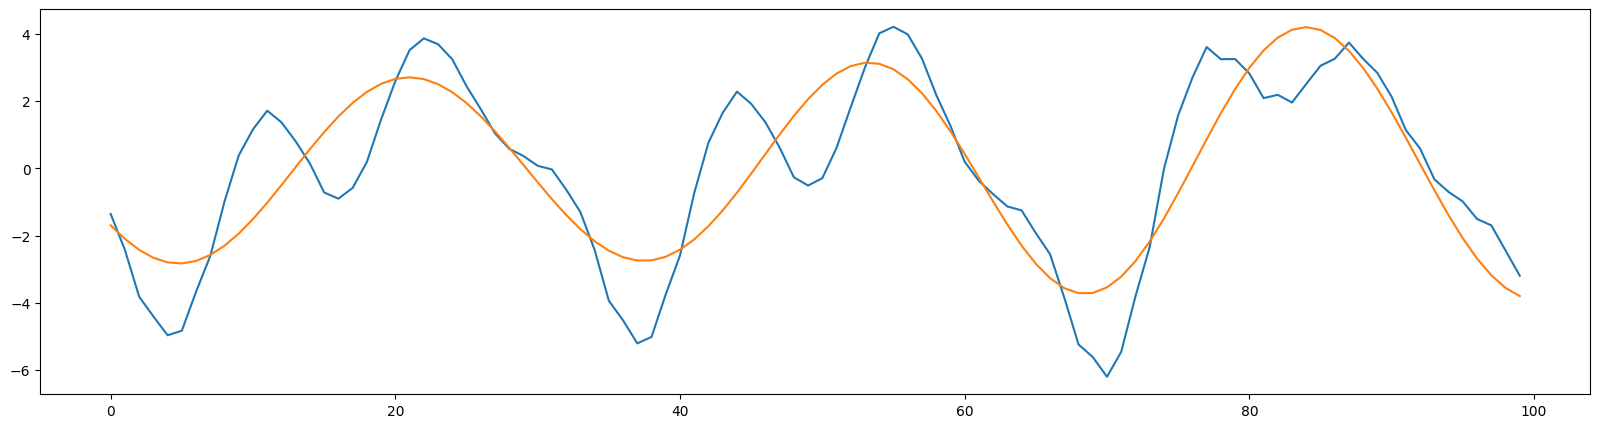

In [43]:
plt.figure(figsize=(20,5))

plt.plot(X_train_scaled[0, 5000:5100, 0])
plt.plot(dft_inv[0, 5000:5100])

plt.show()

In [44]:
df_train_dft = pd.DataFrame(X_train_dft)
df_test_dft = pd.DataFrame(X_test_dft)

In [45]:
df_train_dft.to_csv("ts_data_TRAIN_DFT.csv")
df_test_dft.to_csv("ts_data_TEST_DFT.csv")

##Singular Value Decomposition (SVD)

In [ ]:
from sklearn.decomposition import TruncatedSVD, randomized_svd

In [ ]:
svd = TruncatedSVD(n_components=1000)

svd.fit(X_train_scaled[:, :, 0])

X_train_svd = svd.transform(X_train_scaled[:, :, 0])
X_test_svd = svd.transform(X_test_scaled[:, :, 0])

In [ ]:
X_train_svd.shape

(1828, 1000)

In [ ]:
svd_inv = svd.inverse_transform(X_train_svd)
svd_inv.shape

(1828, 10000)

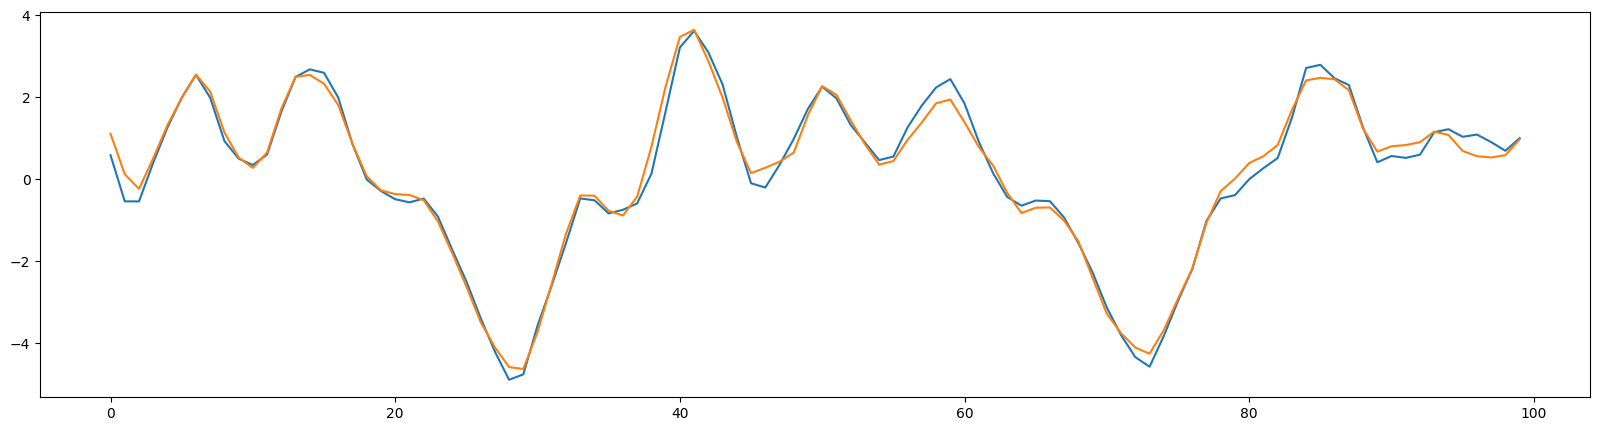

In [ ]:
plt.figure(figsize=(20,5))

plt.plot(X_train_scaled[0, 5000:5100, 0])
plt.plot(svd_inv[0, 5000:5100])

plt.show()

In [ ]:
df_train_svd = pd.DataFrame(X_train_svd)
df_test_svd = pd.DataFrame(X_test_svd)

In [ ]:
df_train_svd.to_csv("ts_data_TRAIN_SVD.csv")
df_test_svd.to_csv("ts_data_TEST_SVD.csv")

##Piecewise Aggregate Approximation (PAA)

In [46]:
n_paa_segments = 1395

paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)

paa.fit(X_train_scaled)

X_train_paa = paa.transform(X_train_scaled)
X_test_paa = paa.transform(X_test_scaled)

In [47]:
X_train_paa.shape

(1828, 1395, 1)

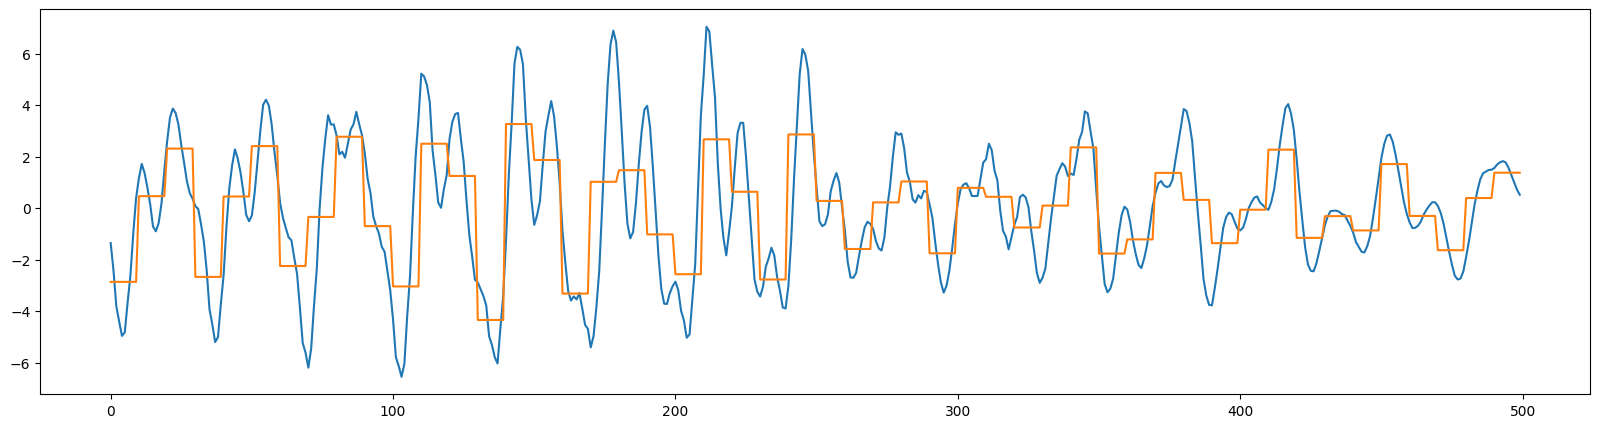

In [106]:
plt.figure(figsize=(20,5))

paa_inv = paa.inverse_transform(X_train_paa)

plt.plot(X_train_scaled[0, 5000:5500, 0])
plt.plot(paa_inv[0, 5000:5500, 0])

plt.savefig("time_series_PAA.pdf", format="pdf")
plt.show()

In [49]:
df_train_paa = pd.DataFrame(X_train_paa[:, :, 0])
df_test_paa = pd.DataFrame(X_test_paa[:, :, 0])

In [50]:
df_train_paa.to_csv("ts_data_TRAIN_PAA.csv")
df_test_paa.to_csv("ts_data_TEST_PAA.csv")

##Symbolic Aggregate Approximation (SAX)

In [77]:
n_paa_segments = 1395

sax = SymbolicAggregateApproximation(
    n_segments = n_paa_segments,
    alphabet_size_avg = 14
)

sax.fit(X_train_scaled)

X_train_sax = sax.transform(X_train_scaled)
X_test_sax = sax.transform(X_test_scaled)

In [78]:
X_train_sax.shape

(1828, 1395, 1)

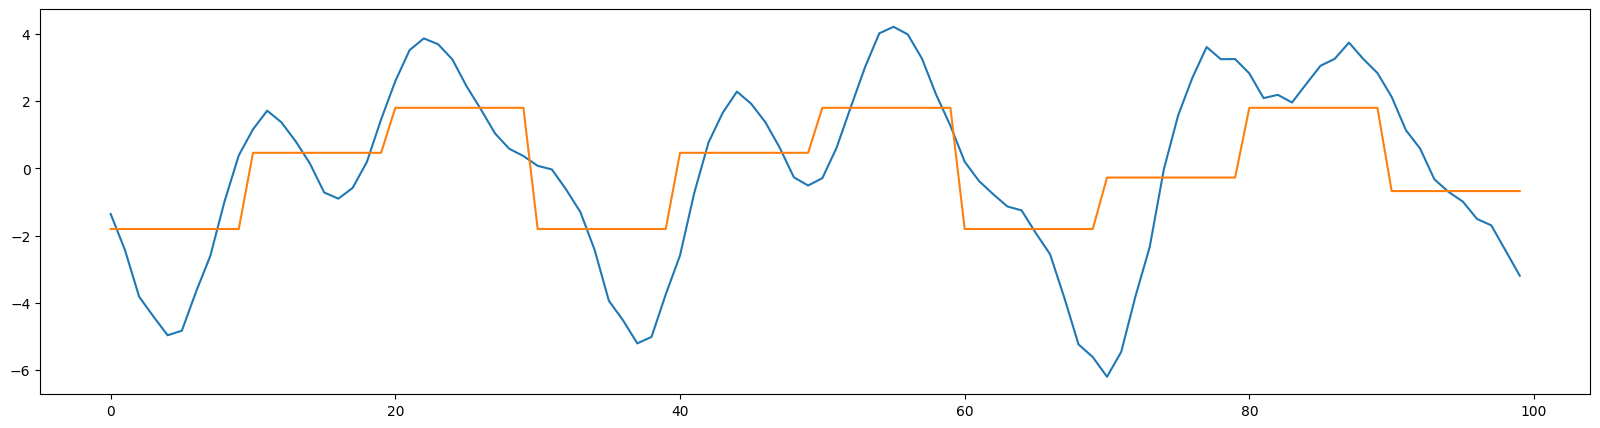

In [79]:
plt.figure(figsize=(20,5))

sax_inv = sax.inverse_transform(X_train_sax)

plt.plot(X_train_scaled[0, 5000:5100, 0])
plt.plot(sax_inv[0, 5000:5100, 0])

plt.show()

In [80]:
sax_inv.shape

(1828, 13955, 1)

In [81]:
df_train_sax = pd.DataFrame(X_train_sax[:, :, 0])
df_test_sax = pd.DataFrame(X_test_sax[:, :, 0])

In [82]:
df_train_sax.to_csv("ts_data_TRAIN_SAX.csv")
df_test_sax.to_csv("ts_data_TEST_SAX.csv")

##1D Symbolic Aggregate Approximation (1D-SAX)

In [ ]:
n_paa_segments = 1000

sax_1D = OneD_SymbolicAggregateApproximation(
    n_segments = n_paa_segments,
    alphabet_size_avg = 5,
    alphabet_size_slope = 5
)

sax_1D.fit(X_train_scaled)

X_train_sax1D = sax_1D.transform(X_train_scaled)
X_test_sax1D = sax_1D.transform(X_test_scaled)

SystemError: ignored

In [ ]:
X_train_sax1D[0, :, 1]

In [ ]:
df_train_sax1D = pd.DataFrame(X_train_sax1D[:, :, 0])
df_test_sax1D = pd.DataFrame(X_test_sax1D[:, :, 0])

In [ ]:
df_train_sax1D.to_csv("ts_data_TRAIN_SAX1D.csv")
df_test_sax1D.to_csv("ts_data_TEST_SAX1D.csv")

#Approximation 100

##DiscreteFourierTransform (DFT)

In [57]:
!pip install pyts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [58]:
from pyts.approximation import DiscreteFourierTransform

In [59]:
n_coefs = 139

dft = DiscreteFourierTransform(n_coefs=n_coefs)

dft.fit(X_train_scaled[:, :, 0])

X_train_dft_100 = dft.transform(X_train_scaled[:, :, 0])
X_test_dft_100 = dft.transform(X_test_scaled[:, :, 0])

In [60]:
X_train_dft_100.shape

(1828, 139)

In [61]:
# code derived from https://pyts.readthedocs.io/en/stable/auto_examples/approximation/plot_dft.html
def dft_inverse_trasform(X_dft, n_coefs, n_timestamps):
    # Compute the inverse transformation
    n_samples = X_dft.shape[0]
    if n_coefs % 2 == 0:
        real_idx = np.arange(1, n_coefs, 2)
        imag_idx = np.arange(2, n_coefs, 2)
        X_dft_new = np.c_[
            X_dft[:, :1],
            X_dft[:, real_idx] + 1j * np.c_[X_dft[:, imag_idx],
                                            np.zeros((n_samples, ))]
        ]
    else:
        real_idx = np.arange(1, n_coefs, 2)
        imag_idx = np.arange(2, n_coefs + 1, 2)
        X_dft_new = np.c_[
            X_dft[:, :1],
            X_dft[:, real_idx] + 1j * X_dft[:, imag_idx]
        ]
    X_irfft = np.fft.irfft(X_dft_new, n_timestamps)
    return X_irfft

In [62]:
dft_inv_100 = dft_inverse_trasform(X_train_dft_100, n_coefs=n_coefs, n_timestamps=len(X_train_scaled[0]))
dft_inv_100.shape

(1828, 13955)

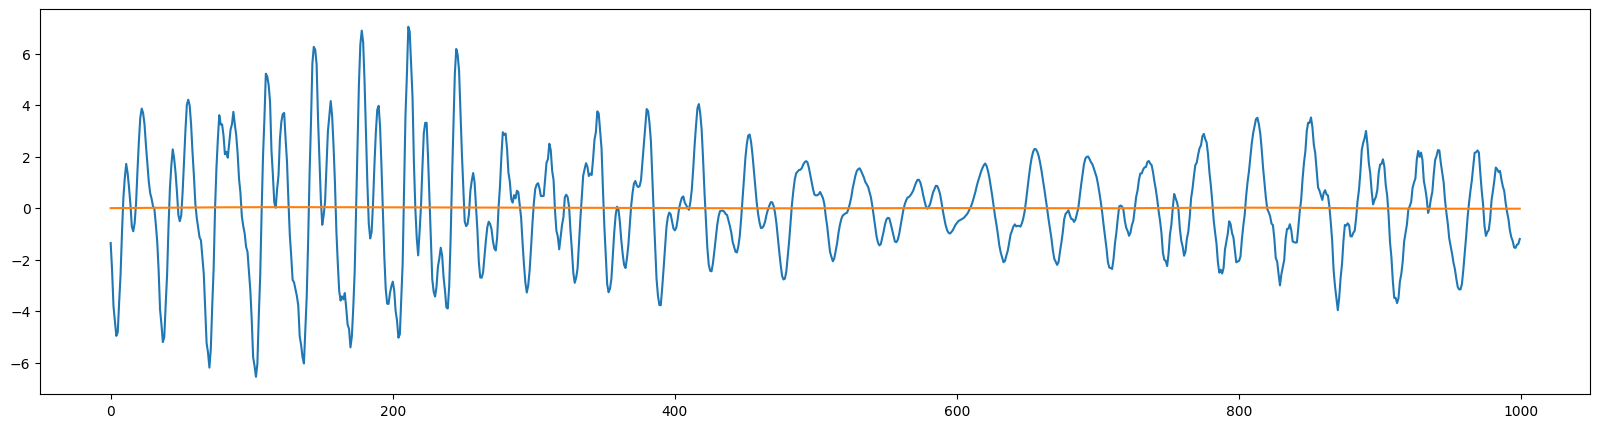

In [63]:
plt.figure(figsize=(20,5))

plt.plot(X_train_scaled[0, 5000:6000, 0])
plt.plot(dft_inv_100[0, 5000:6000])

plt.show()

In [64]:
df_train_dft_100 = pd.DataFrame(X_train_dft_100)
df_test_dft_100 = pd.DataFrame(X_test_dft_100)

In [65]:
df_train_dft_100.to_csv("ts_data_TRAIN_100_DFT.csv")
df_test_dft_100.to_csv("ts_data_TEST_100_DFT.csv")

##Piecewise Aggregate Approximation (PAA)

In [66]:
n_paa_segments = 139

paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)

paa.fit(X_train_scaled)

X_train_paa_100 = paa.transform(X_train_scaled)
X_test_paa_100 = paa.transform(X_test_scaled)

In [67]:
X_train_paa_100.shape

(1828, 139, 1)

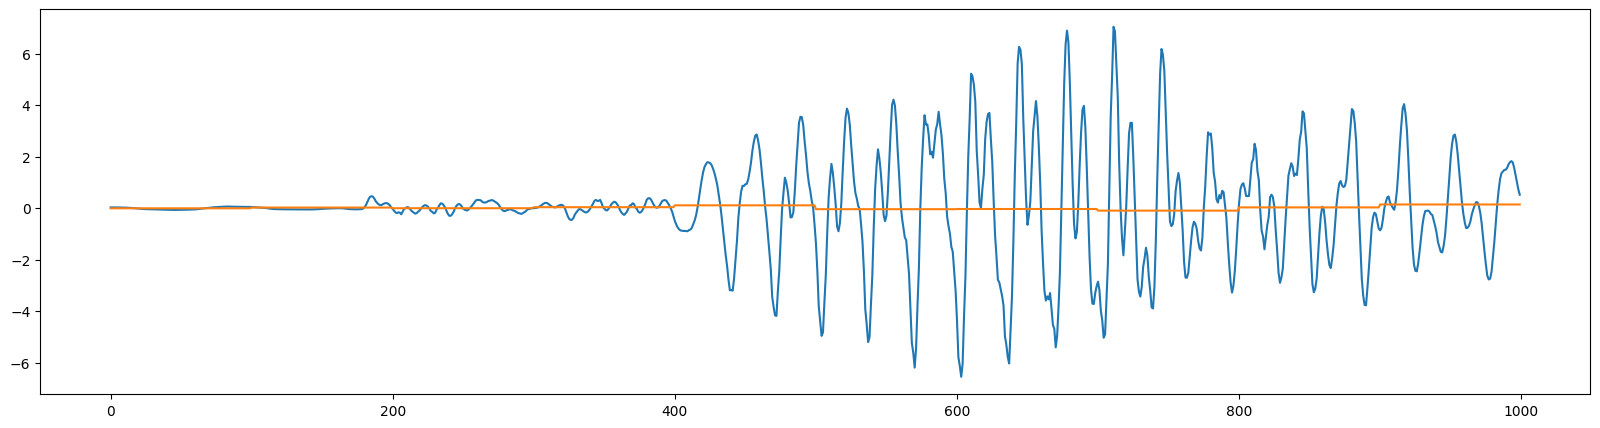

In [68]:
plt.figure(figsize=(20,5))

paa_inv_100 = paa.inverse_transform(X_train_paa_100)

plt.plot(X_train_scaled[0, 4500:5500, 0])
plt.plot(paa_inv_100[0, 4500:5500, 0])

plt.show()

In [69]:
df_train_paa_100 = pd.DataFrame(X_train_paa_100[:, :, 0])
df_test_paa_100 = pd.DataFrame(X_test_paa_100[:, :, 0])

In [70]:
df_train_paa_100.to_csv("ts_data_TRAIN_100_PAA.csv")
df_test_paa_100.to_csv("ts_data_TEST_100_PAA.csv")

##Symbolic Aggregate Approximation (SAX)

In [83]:
n_paa_segments = 139

sax = SymbolicAggregateApproximation(
    n_segments = n_paa_segments,
    alphabet_size_avg = 14
)

sax.fit(X_train_scaled)

X_train_sax_100 = sax.transform(X_train_scaled)
X_test_sax_100 = sax.transform(X_test_scaled)

In [84]:
X_train_sax.shape

(1828, 1395, 1)

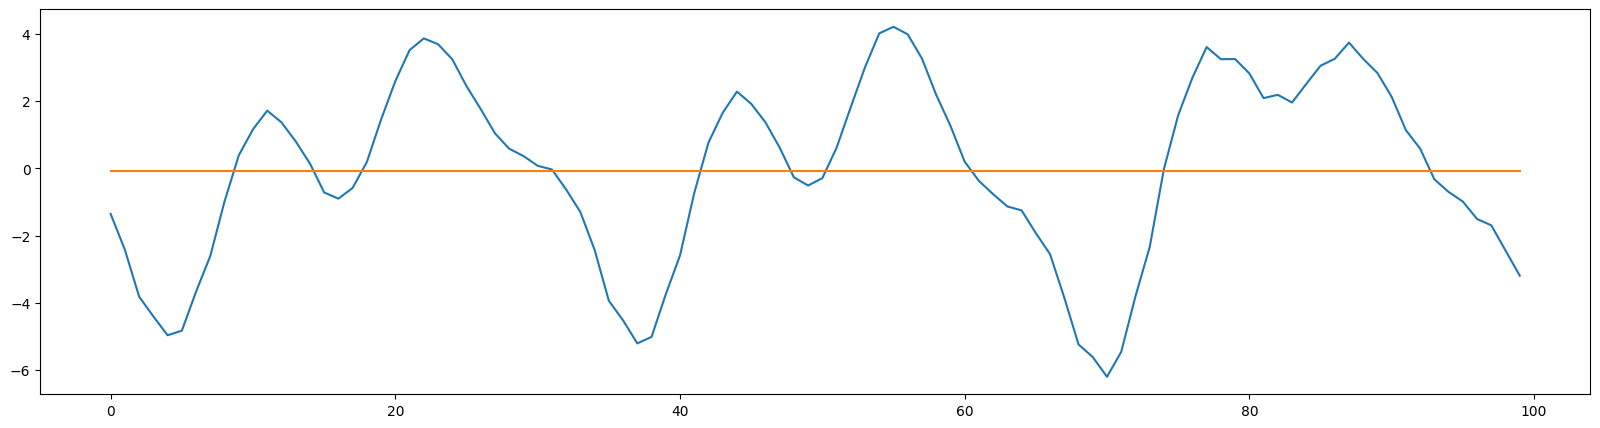

In [85]:
plt.figure(figsize=(20,5))

sax_inv_100 = sax.inverse_transform(X_train_sax_100)

plt.plot(X_train_scaled[0, 5000:5100, 0])
plt.plot(sax_inv_100[0, 5000:5100, 0])

plt.show()

In [86]:
sax_inv_100.shape

(1828, 13955, 1)

In [87]:
df_train_sax_100 = pd.DataFrame(X_train_sax_100[:, :, 0])
df_test_sax_100 = pd.DataFrame(X_test_sax_100[:, :, 0])

In [88]:
df_train_sax_100.to_csv("ts_data_TRAIN_100_SAX.csv")
df_test_sax_100.to_csv("ts_data_TEST_100_SAX.csv")